In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('/Users/nguyenphanthaonguyen/Downloads/Apple.csv', header=0, parse_dates=[0], index_col=0)

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-12-12  42.599998  42.980000  42.255001  42.275002  40.576008  142510800
2018-12-13  42.622501  43.142502  42.387501  42.737499  41.019917  127594400
2018-12-14  42.250000  42.270000  41.320000  41.369999  39.707371  162814800
2018-12-17  41.362499  42.087502  40.682499  40.985001  39.337845  177151600
2018-12-18  41.345001  41.882500  41.097500  41.517502  39.848946  135366000


In [2]:
# 2.  chia train test theo tỉ lệ 9:1
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [3]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5206.657, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5204.822, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5203.222, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5202.959, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5205.863, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5203.327, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5203.635, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5205.216, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5204.394, Time=0.01 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.661 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [4]:

y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))


In [5]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[183.74946206 183.87442055 183.99937904 184.12433753 184.24929602
 184.37425451 184.499213   184.62417149 184.74912998 184.87408847
 184.99904696 185.12400545 185.24896394 185.37392243 185.49888092
 185.62383941 185.7487979  185.87375639 185.99871488 186.12367337
 186.24863186 186.37359035 186.49854884 186.62350733 186.74846582
 186.87342431 186.9983828  187.12334129 187.24829977 187.37325826]


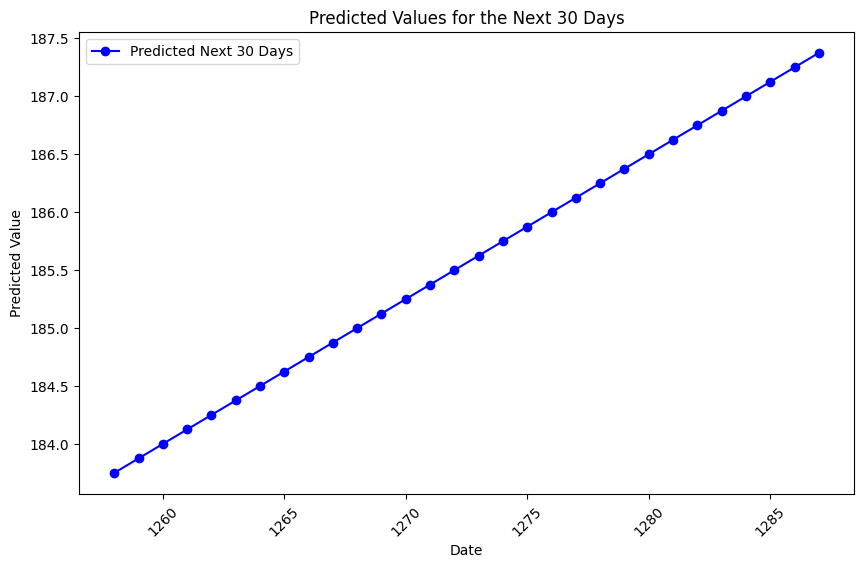

In [6]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, y_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [7]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: 12.935218760374351
Testing MAPE: 0.06163668390331109
Testing MAE: 11.022315566571754


Testing RMSE: 12.935218760374351
Testing MAPE: 0.06163668390331109
Testing MAE: 11.022315566571754


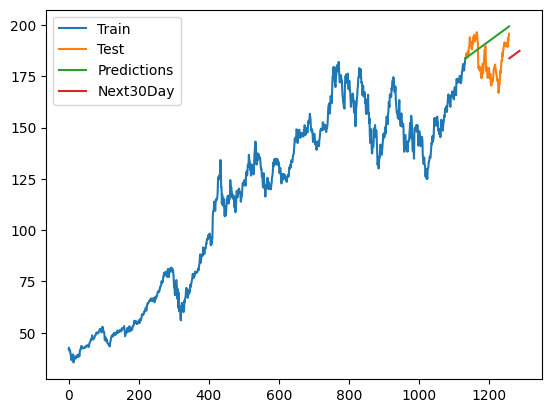

In [8]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [9]:
test_data.index

RangeIndex(start=1132, stop=1257, step=1)